Run the cell below if you are using Google Colab to mount your Google Drive in your Colab instance. Adjust the path to the files in your Google Drive as needed if it differs.

If you do not use Google Colab, running the cell will simply do nothing, so do not worry about it.

In [3]:
try:
    from google.colab import drive
    drive.mount('/content/drive/')
    %cd 'drive/My Drive/Colab Notebooks/04_Classification'
except ImportError as e:
    pass

## Exercise 4: Classification

### 4.1. Who should get a bank credit?
The German credit data set from the UCI data set library (http://archive.ics.uci.edu/ml/index.html) describes the customers of a bank with respect to whether they should get a bank credit or not. The data set is provided as credit-g.arff file in ILIAS. 

#### 4.1.1.	Plot ROC curves for k-NN (different k values), Logistic Regression and Naïve Bayes classification (you can use the given avg_roc function). Which classification approach looks most promising to you?

In [4]:
import pandas as pd
from scipy.io import arff
credit_arff_data, credit_arff_meta = arff.loadarff(open('credit-g.arff', 'r'))
credit = pd.DataFrame(credit_arff_data)
# select all columns of type object
columns_with_binary_strings = credit.select_dtypes('object').columns.values

# decode the values of these columns using utf-8
credit[columns_with_binary_strings] = credit[columns_with_binary_strings].apply(lambda x: x.str.decode("utf-8"))
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [18]:
list_standard_scaler = ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']

In [24]:
for column in credit.columns:
    if column not in list_standard_scaler:
        print('\'',end='')
        print(column,end='')
        print('\',',)

'checking_status',
'credit_history',
'purpose',
'savings_status',
'employment',
'personal_status',
'other_parties',
'property_magnitude',
'other_payment_plans',
'housing',
'job',
'own_telephone',
'foreign_worker',
'class',


First define the preprocessing. Have a look at the class distribution and feature types and think about appropriate transformations.

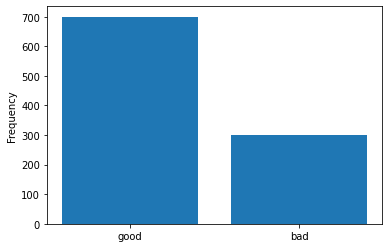

In [104]:
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt

# separate the target variable from the features
credit_target = credit['class']
credit_data = credit.drop('class', axis=1)


class_dist = credit_target.value_counts()
plt.bar(class_dist.index, class_dist)
plt.ylabel("Frequency")
plt.show()
# TODO: plot the class distribution

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [114]:
preprocessor = ColumnTransformer(
    transformers=[
        # use StandardScaler for Temperature and Humidity
        ('scaler', StandardScaler(), ['duration','credit_amount','installment_commitment','residence_since','age','existing_credits','num_dependents']),
        # use OrdinalEncoder for rest
        ('encoder', OrdinalEncoder(), ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker']),
        #('scaler2', StandardScaler(), ['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker'])
    ])

In [116]:

# TODO: define the preprocessings via a ColumnTransformer
pipeline = Pipeline([ ('preprocessing', preprocessor)])# , ('classification', estimator) ])

# TODO: apply the fit_transform function
credit_data_transformed = pipeline.fit_transform(credit_data)
credit_data_transformed_df = pd.DataFrame(credit_data_transformed)
credit_data_transformed_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.236478,-0.745131,0.918477,1.046987,2.766456,1.027079,-0.428290,1.0,1.0,6.0,4.0,3.0,3.0,2.0,3.0,1.0,1.0,1.0,1.0,1.0
1,2.248194,0.949817,-0.870183,-0.765977,-1.191404,-0.704926,-0.428290,0.0,3.0,6.0,2.0,0.0,0.0,2.0,3.0,1.0,1.0,1.0,0.0,1.0
2,-0.738668,-0.416562,-0.870183,0.140505,1.183312,-0.704926,2.334869,3.0,1.0,2.0,2.0,1.0,3.0,2.0,3.0,1.0,1.0,3.0,0.0,1.0
3,1.750384,1.634247,-0.870183,1.046987,0.831502,-0.704926,2.334869,1.0,3.0,3.0,2.0,1.0,3.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,0.256953,0.566664,0.024147,1.046987,1.535122,1.027079,2.334869,1.0,2.0,4.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-0.738668,-0.544162,0.024147,1.046987,-0.399832,-0.704926,-0.428290,3.0,3.0,3.0,2.0,1.0,0.0,2.0,3.0,1.0,1.0,3.0,0.0,1.0
996,0.754763,0.207612,0.918477,1.046987,0.391740,-0.704926,-0.428290,1.0,3.0,9.0,2.0,0.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0
997,-0.738668,-0.874503,0.918477,1.046987,0.215835,-0.704926,-0.428290,3.0,3.0,6.0,2.0,3.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,1.0
998,1.999289,-0.505528,0.918477,1.046987,-1.103451,-0.704926,-0.428290,1.0,3.0,6.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,1.0,1.0


In [125]:

credit_target_transformed = credit_target.replace('good',0)
credit_target_transformed = credit_target_transformed.replace('bad',1)

credit_target_transformed

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    0
Name: class, Length: 1000, dtype: int64

Run the following cell once to define the ```avg_roc``` function:

In [57]:
#define function for computing average roc for cross validation
#see http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
from numpy import interp
from sklearn.metrics import roc_curve, auc

def avg_roc(cv, estimator, data, target, pos_label):
    mean_fpr = np.linspace(0, 1, 100) # = [0.0, 0.01, 0.02, 0.03, ... , 0.99, 1.0]
    tprs = []
    aucs = []
    
    for train_indices, test_indices in cv.split(data, target):
        train_data = data.iloc[train_indices]
        train_target = target[train_indices]
        estimator.fit(train_data, train_target)

        test_data = data.iloc[test_indices]
        test_target = target[test_indices]
        decision_for_each_class = estimator.predict_proba(test_data)#have to use predict_proba or decision_function 
    
        fpr, tpr, thresholds = roc_curve(test_target, decision_for_each_class[:,1], pos_label=pos_label)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0 # tprs[-1] access the last element
        aucs.append(auc(fpr, tpr))
        
        #plt.plot(fpr, tpr)# plot for each fold
        
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0 # set the last tpr to 1
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    return mean_fpr, mean_tpr, mean_auc, std_auc

Evaluate different classifiers using the ```avg_roc``` function and plot the results:

In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

estimators = [KNeighborsClassifier(n_neighbors=4),LogisticRegression(),GaussianNB()]
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42, )
# TODO: Evaluate different classifiers using the avg_roc function and plot the results:
              
estimator = estimators[0]   

data_train, data_test, target_train, target_test = train_test_split(credit_data_transformed, credit_target)

# fit to the training data
estimator.fit(data_train, target_train)

proba_for_each_class = estimator.predict_proba(data_test)
proba_for_each_class_format = []
for i in proba_for_each_class:
    proba_for_each_class_format.append(i[0])


In [140]:
target_test

885    1
938    1
686    0
474    1
560    0
      ..
984    0
418    0
784    0
285    0
927    1
Name: class, Length: 250, dtype: int64

#### 4.1.2.	For the two most promising classification approaches, compute the accuracy and confusion matrix in a 10-fold CV setup. Which level of accuracy do you reach?

In [84]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# compute the accuracy and confusion matrix in a 10-fold CV setup
predicted = cross_val_predict(KNeighborsClassifier(), credit_data_transformed, credit_target_transformed, cv=10)
print("Classification Report:")
print(classification_report(credit_data_transformed, credit_target_transformed, target_names=['good','bad']))

Classification Report:


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

#### 4.1.3.	What do the precision and recall values for the class “bad”  tell you? Try to improve the situation by increasing the number of “bad” examples in the training set (in the cross validation). How do precision and recall change if you apply this procedure? 

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# TODO: create a new pipeline with balancing and use KNN and Logistic Regression

#### 4.1.4.	To model a use case specific evaluation, compute the cost of all missclassifications. Set up your cost matrix by assuming that you will lose 1 Unit if you refuse a credit to a good customer, but that you lose 100 Units if you give a bad customer a credit. Rerun the experiments and evaluate the results.

In [ ]:
# TODO: Set up your cost matrix
# TODO: compute the cost 

#### 4.1.5.	As the creation of training data is mostly a manual task and humans tend to be fallible, training data might include noise. Simulate this behavior by using the Add Noise function and change the parameter “percentage” from 0% over 10% to 20%. Is your preferred classification approach still feasible for this situation? How does the performance of the other classifiers evolve?

In [ ]:
# Run this cell to define add_noise function
import random 
from sklearn.utils.multiclass import unique_labels
def add_noise(raw_target, percentage):    
    labels = unique_labels(raw_target)
    target_with_noise = []
    for one_target_label in raw_target:
        if random.randint(1,100) <= percentage:
            target_with_noise.append(next(l for l in labels if l != one_target_label))
        else:
            target_with_noise.append(one_target_label)
    return target_with_noise

In [ ]:
# TODO: run KNeighborsClassifier and LogisticRegression with different amount of noise

### 4.2. Open Competition: Finding rich Americafrom sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScalerns
The Adult data set from the UCI data set library (http://archive.ics.uci.edu/ml/datasets/Adult) describes 48842 persons from the 1994 US Census. The data set is provided as adult.arff file on the website of this course. 

Your task is to find a good classifier for determining whether a person earns over 50.000 $ 
a year. Beside of being accurate, your classifier should also have balanced precision and recall.

To evaluate your classifiers use train_test_split validation (test_size=0.2, random_state=42).
In order to find the best classifier, you may experiment with:
1.	different algorithms
2.	different parameter settings
3.	the balance of the two classes in the data set
4.	the set of attributes that are used or not used
5.	other preprocessing techniques

In order to increase your understanding of the data set, you might want to visualize different attributes or attribute combinations.

In [178]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [164]:
adult_arff_data, adult_arff_meta = arff.loadarff(open('adult.arff', 'r'))
adult = pd.DataFrame(adult_arff_data)
adult = adult.applymap(lambda x: x.decode('utf8').replace("'", "") if hasattr(x, 'decode') else x)

adult_target = np.array(adult['class'])
adult_data = adult.drop('class', axis=1)
adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25.0,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States
1,38.0,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States
2,28.0,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States
3,44.0,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States
4,18.0,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States


### preprocessing data

In [170]:
#adult_data.dtypes

In [166]:
scale_att = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
encode_att = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [167]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), scale_att),
        ('encoder', OrdinalEncoder(), encode_att )
    ])

In [168]:
pipeline = Pipeline([ ])

adult_data = pipeline.fit_transform(adult_data)
adult_data_df = pd.DataFrame(adult_data)

# Train models

In [171]:
# TODO: Create train/test split
X_train, X_test, y_train, y_test = train_test_split(adult_data, adult_target, test_size=0.2, random_state=42)

### GridSearch without pipeline

In [186]:
# create an estimator
knn_estimator = KNeighborsClassifier()

# specify the parameter grid
parameters = {
    'n_neighbors': range(10, 14)
}

# specify the cross validation
stratified_10_fold_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# create the grid search instance
grid_search_estimator = GridSearchCV(knn_estimator, parameters, scoring='accuracy', cv=stratified_10_fold_cv, return_train_score=False)

# run the grid search
grid_search_estimator.fit(X_train,y_train)

# print the results of all hyper-parameter combinations
results = pd.DataFrame(grid_search_estimator.cv_results_)
display(results)

# mean_test_score = accuracy
# print the best parameter setting
print("best score is {} with params {}".format(grid_search_estimator.best_score_, grid_search_estimator.best_params_))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.397673,0.867388,2.101899,0.432604,10,{'n_neighbors': 10},0.829324,0.833163,0.831372,0.838239,0.825953,0.821602,0.839263,0.833120,0.838751,0.836447,0.832723,0.005537,2
1,2.461193,0.828951,1.604607,0.082202,11,{'n_neighbors': 11},0.827021,0.829580,0.831627,0.837471,0.833376,0.815715,0.837471,0.832096,0.836703,0.836959,0.831802,0.006357,4
2,2.775076,0.570919,2.021809,0.249326,12,{'n_neighbors': 12},0.830092,0.831627,0.830348,0.838495,0.832096,0.820322,0.841055,0.831328,0.836447,0.836447,0.832826,0.005479,1
3,2.988462,0.803648,2.019123,0.359661,13,{'n_neighbors': 13},0.829324,0.828301,0.833930,0.839007,0.829281,0.818019,0.838751,0.832096,0.837215,0.840031,0.832596,0.006405,3


best score is 0.8328259004977288 with params {'n_neighbors': 12}


## GridSearch with pipeline

In [187]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create the pipeline
transform = StandardScaler()
estimator = KNeighborsClassifier()
pipeline = Pipeline(steps=[ ('normalisation', transform), ('classification', estimator) ])


# specify the parameter grid
parameters = {
    'normalisation__with_mean': [ True, False],
    'normalisation__with_std': [ True, False],
    'classification__n_neighbors': range(2, 6)
}

# create the grid search instance
grid_search_estimator = GridSearchCV(pipeline, parameters, scoring='accuracy', cv=10)

accuracy_best = cross_val_score(grid_search_estimator, X_test,y_test, cv=5, scoring='accuracy', n_jobs=-1)
print("Accuracy = {}%".format(accuracy_best.mean() * 100.0))

grid_search_estimator.fit(X_train,y_train)
display(grid_search_estimator.best_params_)

Accuracy = 83.1201453187784%


{'classification__n_neighbors': 4,
 'normalisation__with_mean': True,
 'normalisation__with_std': True}